# Iris classification

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('https://bit.ly/38XWXS4', header=None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [3]:
X = df.iloc[0:100, [0,2]].values
y = df.iloc[0:100, [4]].values

In [4]:
y = np.array(np.where(y == 'Iris-setosa', -1, 1))

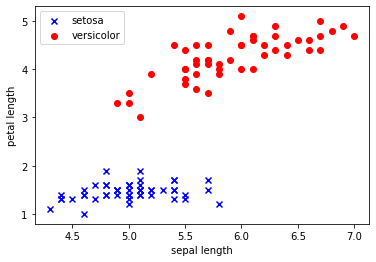

In [5]:
import matplotlib.pyplot as plt
plt.scatter(X[:50, 0], X[:50, 1], color='blue', marker='x', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='red', marker='o', label='versicolor')
plt.legend()
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.show()

In [6]:
class Perceptron(object):
  def __init__(self, eta=0.01, n_iter=50, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state
  
  def fit(self, X, y):
    rgen = np.random.RandomState(self.random_state)
    if self.random_state is None:
      self.w_ = np.zeros(1 + len(X[1]))
    else:
      self.w_ = rgen.normal(loc=0.0, scale = 0.1, size = 1 + X.shape[1])
    self.errors_ = []
    for _ in range(self.n_iter):
      errors = 0
      for xi, yi, in zip(X, y):
        update = self.eta * (yi - self.predict(xi))
        self.w_[1:] += update * xi
        self.w_[0] += update
        errors += int(update != 0.0)
      self.errors_.append(errors)
    return self

  def predict(self, X):
    return np.where(self.net_input(X) >= 0.0, 1, -1)

  def net_input(self, X):
    return np.dot(X, self.w_[1:]) + self.w_[0]

Pesos:  [-0.23756546 -0.70117564  1.76718282]


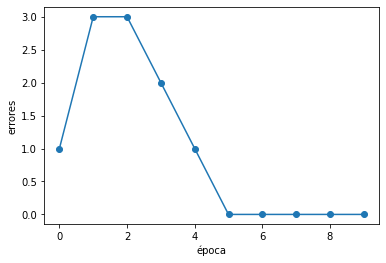

In [7]:
perceptron = Perceptron(eta=0.1, n_iter=10)
perceptron.fit(X, y)
print("Pesos: ", perceptron.w_)
plt.plot(range(len(perceptron.errors_)), perceptron.errors_, marker='o')
plt.xlabel('época')
plt.ylabel('errores')
plt.show()

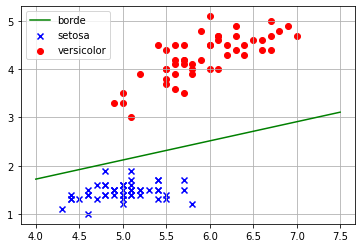

In [8]:
x1 = np.linspace(4, 7.5, 2)
x2 = - (perceptron.w_[0] + perceptron.w_[1] * x1) / perceptron.w_[2]
plt.plot(x1, x2, color='g', label='borde')

plt.scatter(X[:50, 0], X[:50, 1], color='blue', marker='x', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='red', marker='o', label='versicolor')

plt.legend()
plt.grid()
plt.show()